## Hyperparameters

#### What do you mean by parameters?

In simple terms, weights learnt during training can be called as parameters.


#### What are hyperparameters then?

Any kind of value which the data scientist sets from their side.

E.g.:
  - Degree of the model
  - Regularization Rate, lamdba, $λ$

and so on.

<!-- Let's take the example of Regularization rate.

#### What can be the possible cases and values for $λ$?
- Case I: $λ$ = 0
  - No regularization
  - Would mean a very complex model
  - overfitting
- Case II: $λ$ = 10000
  - Would mean a very simple model
  - Underfitting
- Case III: $λ$ = somewhere between 0 and 10000
  - we need to find this value
 -->


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/284/original/image_2023-06-07_172821262.png?1686139103)

#### How do we choose the hyperparameter values?

Steps:
- Train 100 models keeping 100 different values of lambda
- Do $adj. R^2$ test for each of the above models on the test data
- Choose the model with the best $adj. R^2$ Score
- The lambda value of this model would be the optimal hyperparameter for our data


![image.png](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/186/original/image_2023-06-06_215855166.png?1686068937)

<!-- In some cases, we also use performance metric instead of error to find the optimal value (as we did earlier) -->

#### What would the plot between $λ$ and $adj. R^2$ score look like?


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/188/original/image_2023-06-06_221814710.png?1686070097" height=600 width=600>

Notice,

The optimal value of $λ$ is where
- the $adj. R^2$ score is highest for test data
- The distance between the train and Test R2 scores is minimum for maximum value of Test R2 plot

Let's use the code to create X and Y as we did in last lecture

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# lets generate a dataset of 100 points
np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)


Now we divide our data into train and test

In [ ]:
#0.8, 0.2 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape, X_test.shape

((800, 1), (200, 1))

If you remember, we had already seen how to find the optimal value of degree for polynomial regression in the last lecture

Let's use L2/Ridge regression model to tune our hyperparameters-degree and regularization rate

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [ ]:
# Defining our performance metric
def adj_r2(X, y, r2_score):
  return 1 - ((1-r2_score)*(len(y)-1))/(len(y)-X.shape[1]-1)

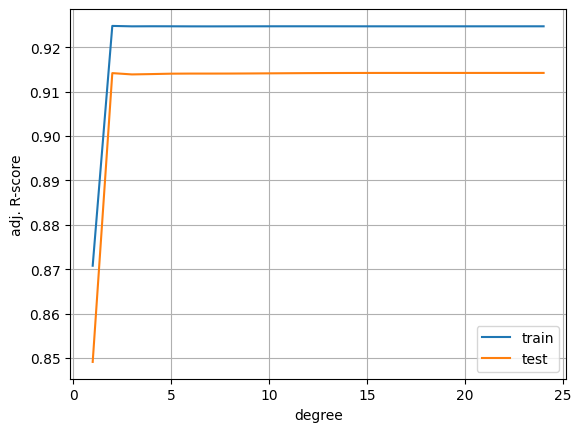

In [ ]:
# Same as last lecture
max_degree = 25 # max polynomial degree
train_scores = []
test_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
  polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  test_score= adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
  train_scores.append(train_score)
  test_scores.append(test_score)

plt.figure()
plt.plot(list(range(1, 25)), train_scores, label="train")
plt.plot(list(range(1, 25)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()


Based on this, the optimal degree would be somewhere around 3.

Now let's see how to optimize our regularization rate.

In [ ]:
train_scores = []
test_scores = []
rate_list = [0.01, 0.1, 1,5, 10]
scaler = StandardScaler()
for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  test_score= adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
  train_scores.append(train_score)
  test_scores.append(test_score)

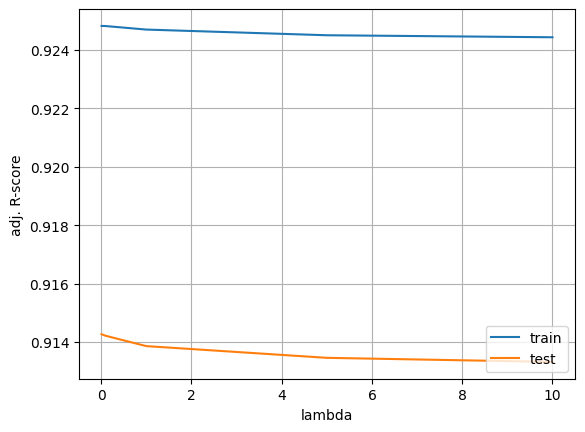

In [ ]:
plt.figure()
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [ ]:
test_scores

[0.9142688321768443,
 0.9142176328264028,
 0.9138636295262608,
 0.9134626780435391,
 0.9133227560134852]

Our optimal lambda value comes out to be around 0.01 based on the test

## Cross-Validation

Do you notice any problem with the above approach?

- We are **training our model on train data, but selecting based on test data**
- The test data doesn't remain unseen anymore, since the adj. R2 score is calculated based on it.

<img src ="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/471/original/image_2023-06-09_143437994.png?1686301518" height=600 width=600>


How do we solve this issue?

**By choosing a validation data**

We will divide our data into three parts
- $D_{train}$ = 60% of data (for training the model)
- $D_{CV}$ or $D_{val}$ = 20% of data (for hyperparameter tuning)
- $D_{test}$ = 20% of data
  - test data which will be unseen by the model
  - will only be used at the end to report the results of training



#### So how do we perform cross validation?

In [ ]:
# lets generate a dataset of 100 points
np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)


Now we divide our data into train, test and validation

In [ ]:
#0.6, 0.2, 0.2 split
from sklearn.model_selection import train_test_split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((600, 1), (200, 1), (200, 1))

Let's visualize our data

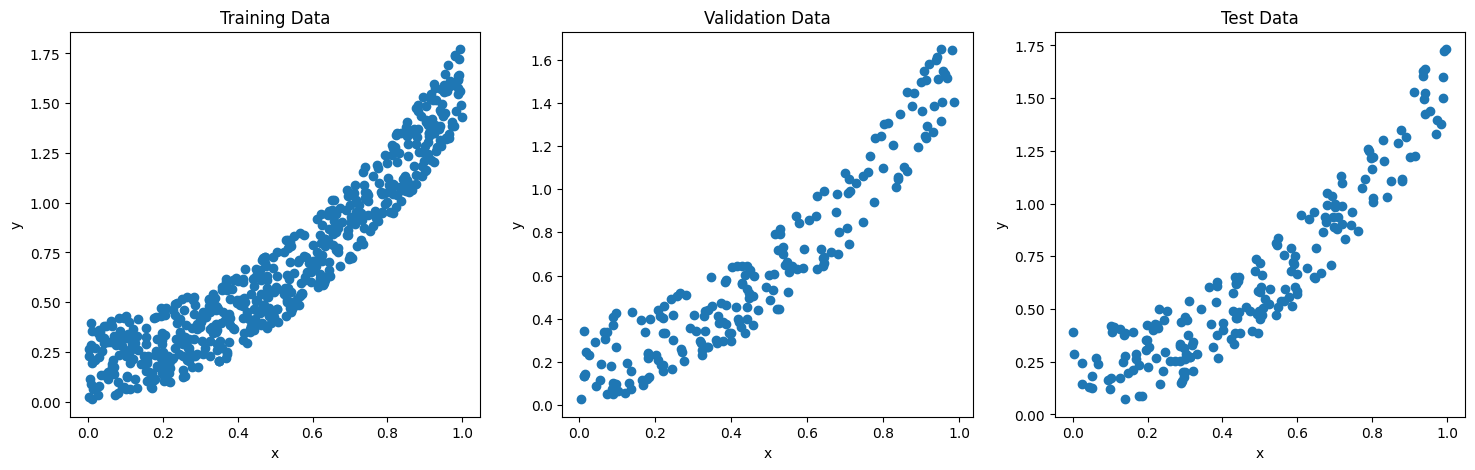

In [ ]:
plt.figure(figsize=(18,5))
data_labels = ["Training Data", "Validation Data", "Test Data" ]
x_labels = [X_train, X_val, X_test]
y_labels = [y_train, y_val, y_test]
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.scatter(x_labels[i], y_labels[i])
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(data_labels[i])

The statistics of our type of data is similar, so we are good to go.

#### Steps to do cross-validation on our data



Now if you remember, in the last lecture we saw how the performance was increasing with increase in degree of the polynomial model

But how do we find the optimal degree in this case?

Let's

Let's try to find the optimal value of `degree` for our polynomial regression model

1. First we take degrees from 1 to 25, and train the model on data for each of these degrees to find the best degree

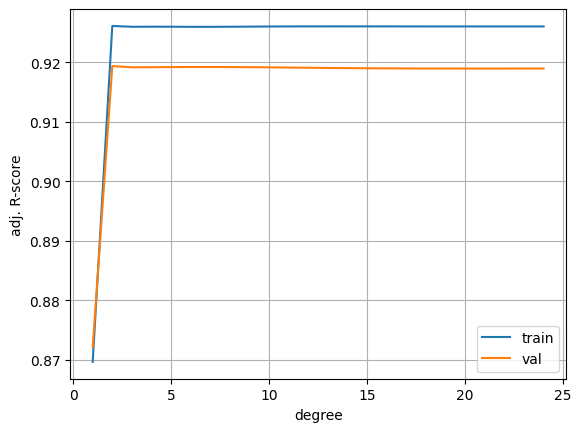

In [ ]:
# Same as we did earlier and in the last lecture
max_degree = 25 # max polynomial degree
train_scores = []
val_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
  polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
  train_scores.append(train_score)
  val_scores.append(val_score)
plt.figure()
plt.plot(list(range(1, 25)), train_scores, label="train")
plt.plot(list(range(1, 25)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

Taking degree=3, we now find the best regularization rate by the same process

In [ ]:
train_scores = []
val_scores = []
rate_list = [0.01, 0.1, 1,5, 10]
for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

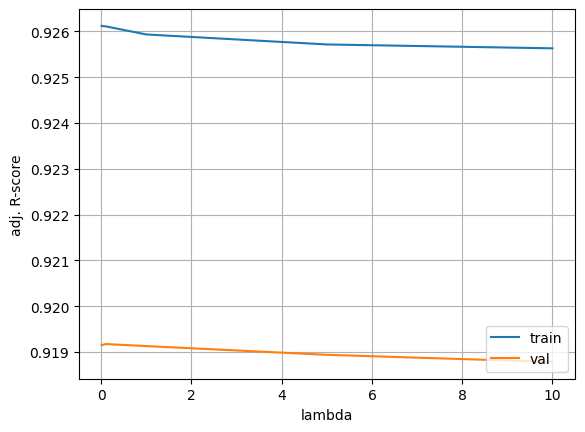

In [ ]:
plt.figure()
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

We take the optimal value of lambda as 0.01

2. Now finally, we measure our model's performance on test data, which our model hasn't seen till now

In [ ]:
polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=0.01))
polyreg_scaled.fit(X_train, y_train)
train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
print(f'Training Score = {train_score}')
val_score = adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
print(f'Validation Score = {val_score}')

Training Score = 0.9261212571628987
Validation Score = 0.9191482611247953


In [ ]:
# Reporting this as the final score
test_score = adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
print(f'Testing Score = {test_score}')

Testing Score = 0.9143625261065258


Observe, the test results are lower than training and validation.

This is because, our model hasn't seen the test data at all, and this can be said as the true result of our model.

#### Try for yourself

- Try to use Linear Regression, Lasso and ElasticNet and see how do the results vary?

But there is one issue with cross validation when there are less number of data points

## K-Fold Cross Validation

#### What would be the problem with Cross Validation in case there are less number of data points?

Suppose we are using a dataset with 100 data points

- On dividing the data between train, test and validation, only 60 datapoint are there for training
- Basically we are wasting 20 points in validation, which can also be used for training the data
- But we can't simply use 80% of our data for training, since this will again create the issue of no data for validation

#### How do we validate our data in case of lesser number of data points?

We use **K-Fold Cross Validation**

This is useful only for small datasets

#### What is k-fold cross validation?


Here, "k" denotes an integer, basically number of folds. This value can vary.

Let's take k=4

We divide our data into 4 parts, 3 for training and 1 for validation, and train our model k times, every time taking a different portion for validation

#### How to implement K-Fold Cross validation?

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/198/original/image_2023-06-07_011139881.png?1686080500" height=600 width=600>

Steps:
- We train our model 4 times, and each time, one portion of the data is kept for validation, while other three portions are used for testing.
- After every training, we find the validation score as cv1, cv2, etc.
- Finally, the performance of the model is said to be the average of all these scores

Notice,
- We aren't wasting any data, since our model is training on all the sets, while also evaluating unseen data in each fold
- The average as metric will give us a higher confidence metric, compared to a single cv score

Usually, we take k=10

Let's look at the implementation.

In [ ]:
# Creating a small dataset of 100 data points
np.random.seed(2)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [ ]:
# Performing k-fold cross validation
degrees = 15 # number of degrees
train_scores = []
val_scores = []

for degree in range(1, degrees):
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in kf.split(X): #iterating through the K-folds

        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
        polyreg_scaled.fit(X_train, y_train) #training model

        train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
        val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))

        fold_train_scores.append(train_score)
        fold_val_scores.append(val_score)

    train_score = np.mean(fold_train_scores)
    val_score = np.mean(fold_val_scores)

    train_scores.append(train_score)
    val_scores.append(val_score)

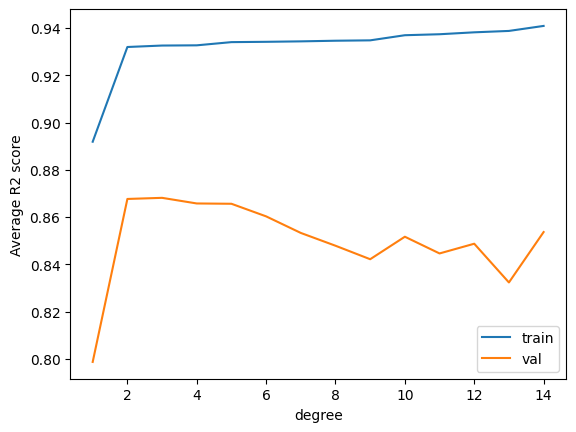

In [ ]:
plt.figure()
plt.plot(list(range(1, 15)), train_scores, label="train")
plt.plot(list(range(1, 15)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("Average R2 score")
plt.show()

Note:

- K-Fold Cross Validation can be computationally expensive
- Hence it's only used for Small datasets
- For large datasets, we have enough datapoints to train the model, hence only cross validation is sufficient

#### Let's start with our usecase for today!

## Introduction to AT&T Churn UseCase

AT & T, one of the leading telecommunications companies of USA, faces the challenge of customer churn, where customers switch to competitors due to issues such as bad network, poor customer service, and so on.

As a Data Scientist, you are tasked to develop a machine learning model to predict whether a customer will be churned or not, based on various parameters, such as state, number of evening calls, number of day calls, etc.

Let's look at the data

In [ ]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 110MB/s]


In [ ]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


**Data Description**
<center>

| Records | Features |
| :-- | :-- |
| 5700 | 21 |


| Id | Features | Description |
| :-- | :--| :--|
|01| **state** | 2-letter code of the US state of customer residence|
|02| **account_length** | Number of months the customer has been with the current telco provider |
|03|**area_code**|string="area_code_AAA" where AAA = 3 digit area code|
|04|**intl_plan**|The customer has international plan|
|05|**vmail_plan**| The customer has voice mail plan|
|06|**vmail_messages**|Number of voice-mail messages|
|07|**day_mins**|Total minutes of day calls|
|08|**day_calls**|Total no of day calls|
|09|**day_charge**|Total charge of day calls|
|10|**eve_mins**|Total minutes of evening calls|
|11|**eve_calls**|Total no of evening calls|
|12|**eve_charge**|Total charge of evening calls|
|13|**night_mins**|Total minutes of night calls|
|14|**night_calls**|Total no of night calls|
|15|**night_charge**|Total charge of night calls|
|16|**intl_mins**|Total minutes of international calls|
|17|**intl_calls**|Total no of international calls|
|18|**intl_charge**|Total charge of international calls|
|19|**customer_service_calls**|Number of calls to customer service|
|20|**phone**|10 digit number|
|21|**churn**|Customer churn - target variable|

In [ ]:
churn['Churn'].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

Observe:
- The number of values are same for both "0" and "1"

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/832/original/image_2023-06-14_170643599.png?1686742605" height=700 width=600>

**m**-> no. of samples

**d**-> no. of features

**n**-> no. of classes

**Data Notation**
- Data X: (m,d)
- $i^{th} \ sample: X^{(i)}$
- $j^{th} \ feature: X_j$
- Target: $(m,1)$ [Can convert to (m, n) for Softmax using preprocessing]
- True output: $y^{(i)}$
- Predicted output: $\hat{y}^{(i)}$

**Parameter Notation**
- $w=\begin{bmatrix}
	w_0 \\
	w_1 \\
	w_2 \\
  . \\
  . \\
  w_d
	\end{bmatrix}$